## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Functions

In [2]:
#     Features:(n_examples, n_features)
#     Labels: (n_examples, 1)
#     Weights:(n_features, 1)


# -- Sigmoid function -- #
def sigmoid(z):
    " Return the sigmoid function "
    return 1/(1+np.exp(-z))

# -- Predictor function -- #
def predict(features, weights):
    '''
    Returns probabilities
    of class label
    '''
    z = np.dot(features, weights)
    return sigmoid(z)

# -- Cost function -- #
def cost_function(features, labels, weights):
    '''    
    Write down the average cross-entropy loss
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    # You may use this format or define in your own way
    # Note: This is for binary cros-entropy loss.
    
    # We can divide the binary cross entropy loss into two parts
    # One for p(y=1) and another for p(y=0)

    # Take the error when label=1
    class1_cost = -np.dot(labels, np.log(predictions))

    # Take the error when label=0
    class2_cost = -np.dot(1-labels, np.log(1-predictions))

    # Take the sum of both costs
    sumcost = class1_cost + class2_cost

    # Take the average cost
    cost = sumcost/observations

    return cost


def update_weights(features, labels, weights, lr):
    '''
   Gradient Descent
    '''
    N = features.shape[1]

    #1 - Get Predictions
    predictions = predict(features,weights)

    gradient = np.dot((predictions-labels), features)

    # 3 Take the average cost derivative for each feature
    gradient /= N

    # 4 Update the weights using the learning rate lr
    weights =  weights - (lr*gradient)

    return weights

def decision_boundary(prob):
    return 1 if prob >= .5 else 0 # You may change the threshold from 0.5 

def train(features, labels, weights, lr, iters):
    cost_history = [np.float64('inf')]

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        
        cost_history.append(cost)

        print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

## Data

In [3]:
data = pd.read_csv("/home/sysadm/Downloads/data_banknote_authentication.txt", sep = ',', names = ['var_w', 'skew_w', 'kur_w', 'entropy', 'class'])
data.head()

,var_w,skew_w,kur_w,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
data.dropna
print(data.shape)

(1372, 5)


In [5]:
X =data.iloc[:,:4]

y = data["class"]


In [6]:
## Train Test Split
x_train, x_test, y_train,  y_test = train_test_split(X, y, test_size=0.2)

In [7]:
y_train.shape

(1097,)

In [36]:
# Initialize the weights
wts = np.zeros(X.shape[1])

# Training
optimal_wts_training, loss_training = train(x_train, y_train, wts, 1e-4, 1000)

iter: 0 cost: 0.6141130296762595
iter: 1 cost: 0.5681463939141461
iter: 2 cost: 0.5363147615509003
iter: 3 cost: 0.5114349108560753
iter: 4 cost: 0.4905575285310672
iter: 5 cost: 0.4723197076494058
iter: 6 cost: 0.4560155028596594
iter: 7 cost: 0.4412378296530312
iter: 8 cost: 0.42772723153305603
iter: 9 cost: 0.4153029331628754
iter: 10 cost: 0.4038293541302734
iter: 11 cost: 0.3931989240266008
iter: 12 cost: 0.3833227904468958
iter: 13 cost: 0.3741255161945494
iter: 14 cost: 0.36554187041388114
iter: 15 cost: 0.3575147599166269
iter: 16 cost: 0.3499938063311731
iter: 17 cost: 0.3429343059950931
iter: 18 cost: 0.3362964289214478
iter: 19 cost: 0.3300445760968838
iter: 20 cost: 0.3241468481376864
iter: 21 cost: 0.31857459677890576
iter: 22 cost: 0.31330204095885267
iter: 23 cost: 0.3083059351469975
iter: 24 cost: 0.30356528104703
iter: 25 cost: 0.2990610759615478
iter: 26 cost: 0.29477609251069814
iter: 27 cost: 0.29069468537008214
iter: 28 cost: 0.28680262140680934
iter: 29 cost: 0.28

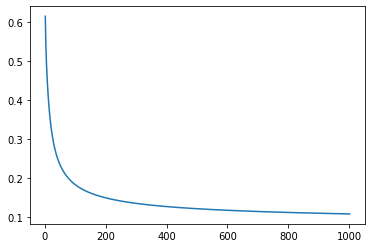

In [37]:
# Plot the loss against the number of epochs
plt.plot(np.arange(1, len(loss_training)+1, 1), loss_training)
plt.show()

In [38]:
predictions_training = []
for elem in predict(x_train, optimal_wts_training):
    predictions_training.append(decision_boundary(elem))

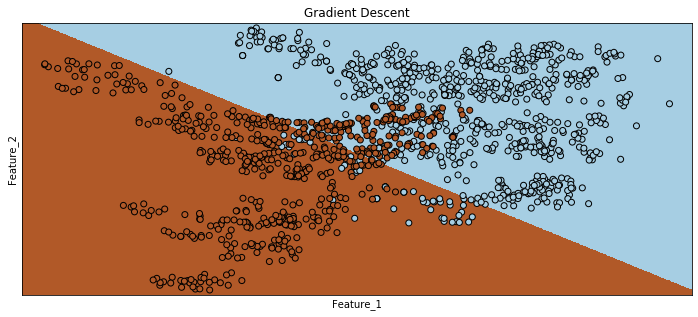

In [39]:
# # Plot the decision boundary for two features. For that, we will assign a color to each
# # point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X['var_w'].min() - 0.5, X['var_w'].max() + 0.5
y_min, y_max = X['skew_w'].min() - 0.5, X['skew_w'].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
probs = predict(np.c_[xx.ravel(), yy.ravel()], optimal_wts_training[:2])
mesh_preds = []
for elem in probs:
    mesh_preds.append(decision_boundary(elem))
Z = np.array(mesh_preds)
#Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# # Plot also the training points
plt.scatter(X['var_w'], X['skew_w'], c=y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.title('Gradient Descent')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [40]:
# Accuracy
print("Accuracy using gradient descent: {}".format(accuracy(predictions_training, y_train)))

Accuracy using gradient descent: 0.95897903372835


In [41]:
#For testing

predictions_test = []
for elem in predict(x_test, optimal_wts_training):
    predictions_test.append(decision_boundary(elem))

In [42]:
# Test Accuracy
print("Accuracy using gradient descent: {}".format(accuracy(predictions_test, y_test)))

Accuracy using gradient descent: 0.9454545454545454


## Scikit-Learn module

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
# L-BFGS
clf_lbfgs = LogisticRegression(solver = 'lbfgs').fit(x_train, y_train)

# Newton-CG
clf_newt = LogisticRegression(solver = 'newton-cg').fit(x_train, y_train)

In [45]:
pred_lbfgs = clf_lbfgs.predict(x_test)
pred_newt = clf_newt.predict(x_test)

In [47]:
# Accuracy
print("Accuracy using L-BFGS: {}".format(accuracy(pred_lbfgs,y_test)))
print('\n')
print("Accuracy using Newton-CG: {}".format(accuracy(pred_newt,y_test)))

Accuracy using L-BFGS: 0.9927272727272727


Accuracy using Newton-CG: 0.9927272727272727
